TASK-4 :  SALES PREDICTION USING PYTHON

BATCH : JANUARY BATCH B6

DOMAIN : DATA SCIENCE

NAME : MONISHA H

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/advertising.csv")
data.head(10)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
data.shape

(200, 4)

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


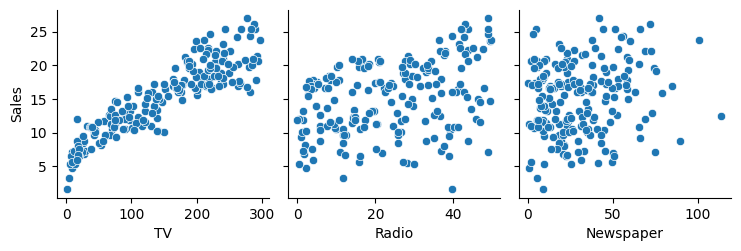

In [12]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

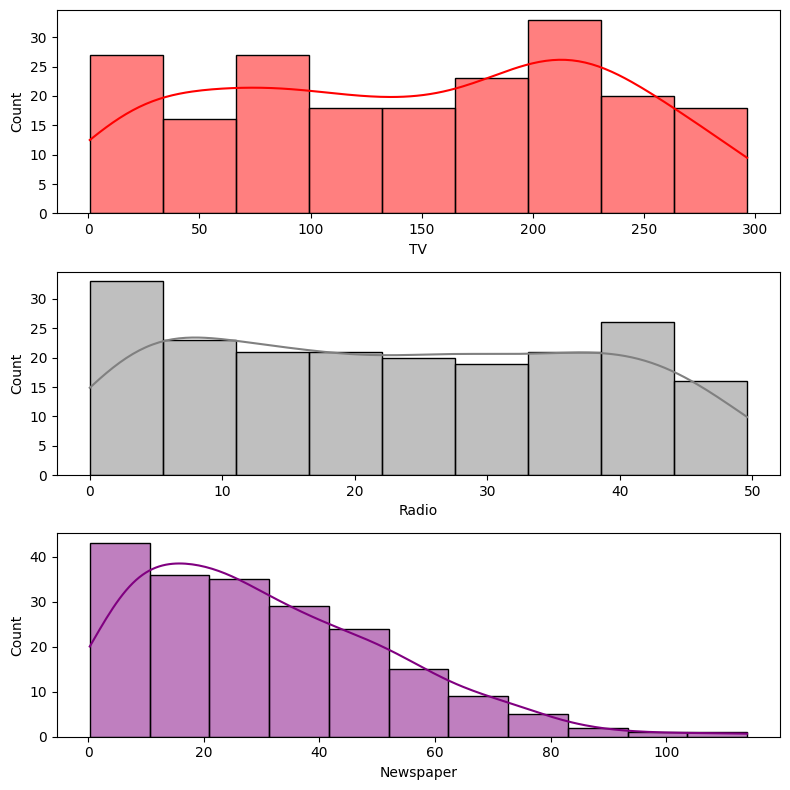

In [19]:
fig, axs = plt.subplots(3, figsize = (8,8))
tv1 = sns.histplot(data['TV'],color='red',kde=True,ax = axs[0])
radio1 = sns.histplot(data['Radio'],color='gray',kde=True,ax = axs[1])
newspaper1 = sns.histplot(data['Newspaper'],color='purple',kde=True,ax = axs[2])
plt.tight_layout()

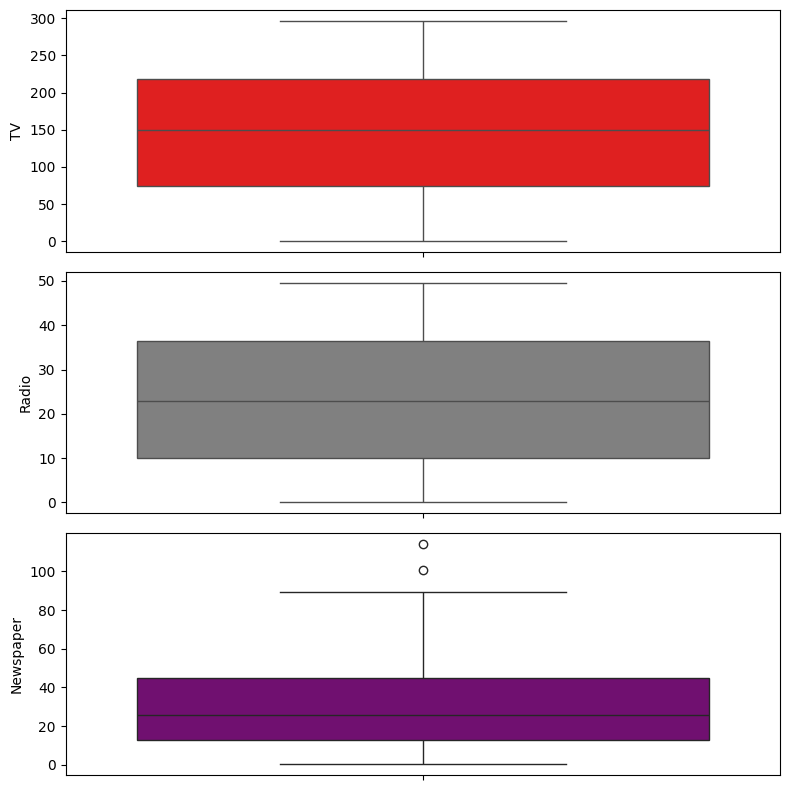

In [20]:
fig, axs = plt.subplots(3, figsize = (8,8))
tv2 = sns.boxplot(data['TV'],color='red',ax = axs[0])
radio2 = sns.boxplot(data['Radio'],color='gray',ax = axs[1])
newspaper2 = sns.boxplot(data['Newspaper'],color='purple',ax = axs[2])
plt.tight_layout()

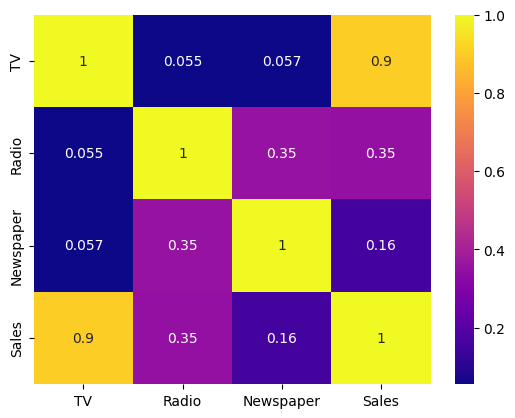

In [21]:
sns.heatmap(data.corr(),annot = True,cmap='plasma')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [25]:
x_test=data[['TV','Radio','Newspaper']]
y_test=data['Sales']

In [26]:
x1_test=sm.add_constant(x_test)
reg=sm.OLS(y_test,x1_test)
model=reg.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           8.13e-99
Time:                        07:33:34   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [28]:
residual_model=model.resid
residual_model

,0
0,0.879028
1,-0.868248
2,1.503791
3,-0.812447
4,2.255863
...,...
195,0.494510
196,3.719059
197,-0.459287
198,0.917780


In [35]:
x_train, x_test, y_train, y_test = train_test_split(data[['TV']], data[['Sales']], test_size = 0.3,random_state=0)
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [34]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [36]:
len(x_train),len(x_test),len(y_train),len(y_test)

(140, 60, 140, 60)

In [39]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
model.coef_

array([[0.05473199]])

In [42]:
model.intercept_

array([7.14382225])

In [44]:
res= model.predict(x_test)
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


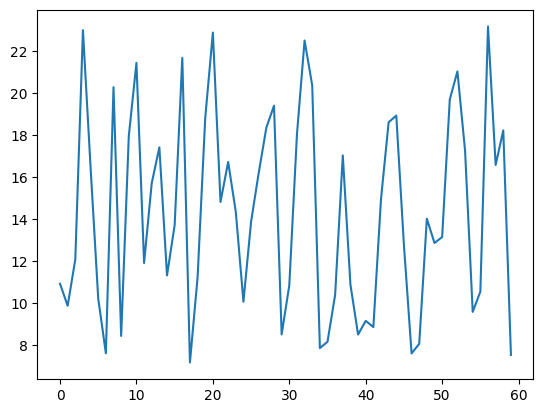

In [45]:
plt.plot(res)


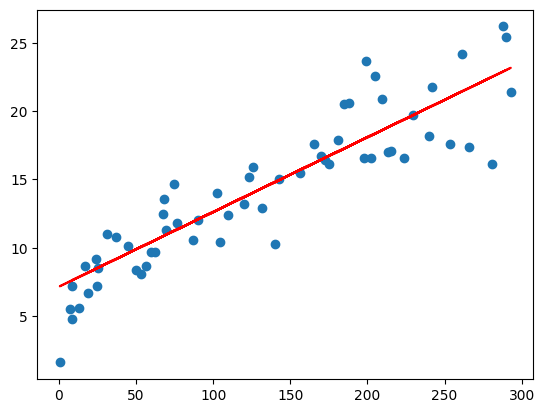

In [48]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.14382225 + 0.05473199 * x_test,'r')
plt.show()

<Axes: ylabel='Count'>

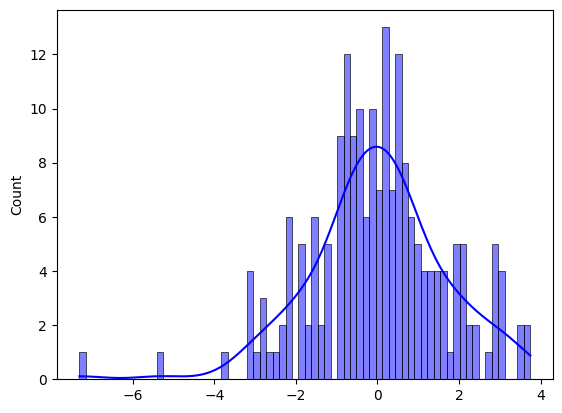

In [50]:
sns.histplot(residual,bins=70,kde=True,color='blue')